<a href="https://colab.research.google.com/github/NDPujari/Machine-Learning/blob/main/EDA_%7C_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
''' Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.
 '''

df=pd.read_csv('BIKE_DETAILS.csv')
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [10]:
''' Question 2: Check for missing values in all columns and describe your approach for
handling them.
 '''

df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [21]:
df.ex_showroom_price.fillna(df.ex_showroom_price.mean(), inplace=True)

In [22]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


In [25]:
''' Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.
 '''

df.selling_price

,selling_price
0,175000
1,45000
2,150000
3,65000
4,20000
...,...
1056,17000
1057,16000
1058,15000
1059,12000


<Axes: xlabel='Selling Price', ylabel='Frequency'>

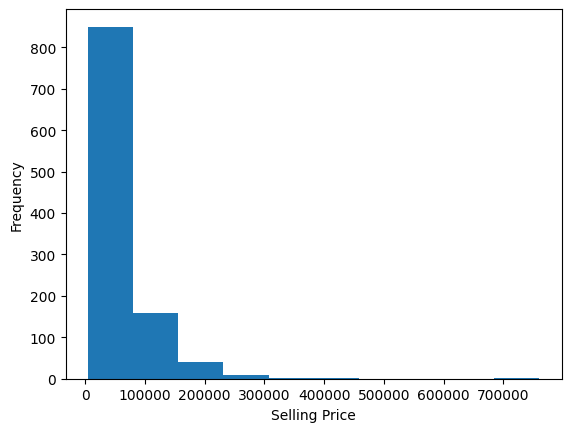

In [29]:
df.selling_price.plot(kind='hist', xlabel='Selling Price', bins=10)


<Axes: xlabel='seller_type', ylabel='selling_price'>

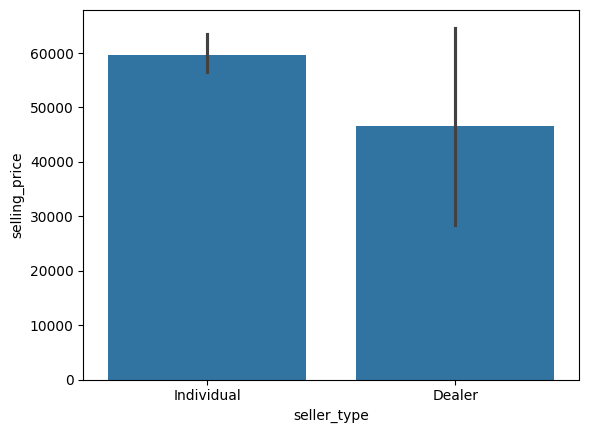

In [30]:
''' Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.
 '''
sns.barplot(x='seller_type', y='selling_price', data=df)

<Axes: xlabel='owner', ylabel='km_driven'>

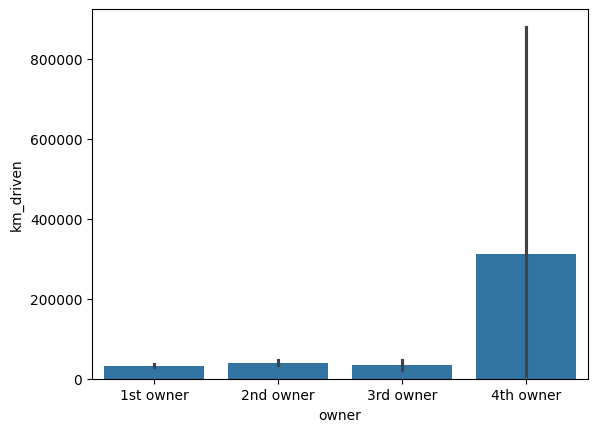

In [35]:
''' Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot. '''


sns.barplot(x='owner', y='km_driven', data=df)

In [42]:
''' Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics. '''

df.km_driven.describe()

Q1=df.km_driven.quantile(0.25)
Q3=df.km_driven.quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

df_clean=df[(df.km_driven>=lower_limit) & (df.km_driven<=upper_limit)]
df_clean

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,87958.714058
1,Honda Dio,45000,2017,Individual,1st owner,5650,87958.714058
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.000000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,87958.714058
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.000000
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.000000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000


In [47]:
''' Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price. '''

df[['year', 'selling_price']]

,year,selling_price
0,2019,175000
1,2017,45000
2,2018,150000
3,2015,65000
4,2011,20000
...,...,...
1056,2010,17000
1057,2012,16000
1058,2013,15000
1059,2009,12000


Text(0, 0.5, 'selling_price')

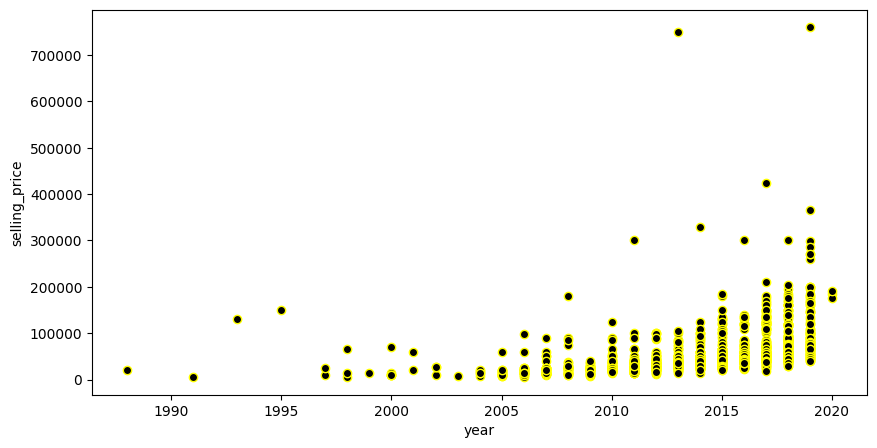

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(x='year', y='selling_price', data=df,color='black', edgecolors='Yellow')
plt.xlabel('year')
plt.ylabel('selling_price')


In [62]:
''' Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame. '''

df.seller_type.unique()

array(['Individual', 'Dealer'], dtype=object)

In [63]:
df_encoded=pd.get_dummies(df, columns=['seller_type'])
df_encoded

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,87958.714058,False,True
1,Honda Dio,45000,2017,1st owner,5650,87958.714058,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.000000,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.000000,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,87958.714058,False,True
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,1st owner,500000,52000.000000,False,True
1057,Honda CB twister,16000,2012,1st owner,33000,51000.000000,False,True
1058,Bajaj Discover 125,15000,2013,2nd owner,35000,57000.000000,False,True
1059,Honda CB Shine,12000,2009,1st owner,53000,58000.000000,False,True


In [69]:
''' Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most? '''

corr= df.corr(numeric_only=True)
corr

,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000000,0.402188,-0.212937,0.750451
year,0.402188,1.000000,-0.288675,0.068111
km_driven,-0.212937,-0.288675,1.000000,-0.082539
ex_showroom_price,0.750451,0.068111,-0.082539,1.000000


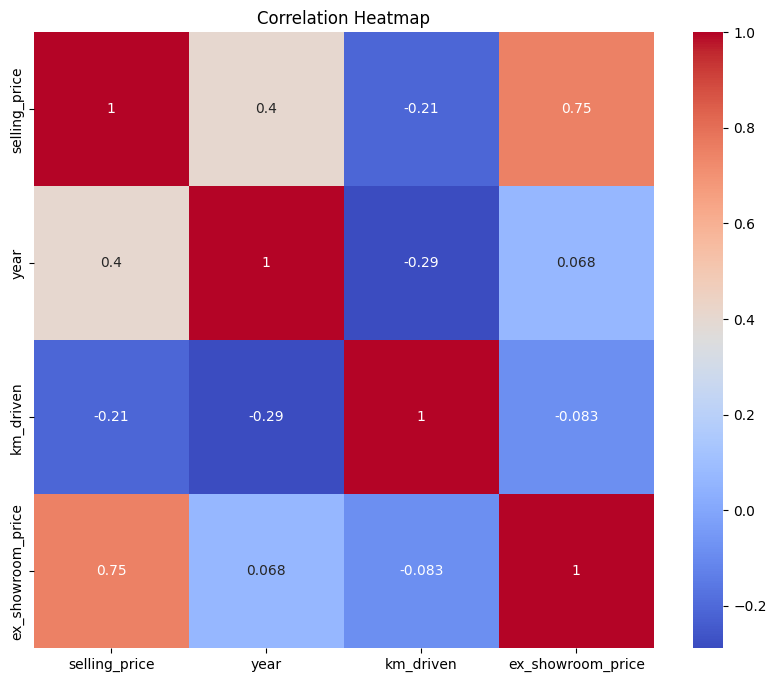

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.

--What are the most important factors affecting a bike's selling price?
-->
    In above heatmap we easily able to see the correlation between selling price with all features. But we easily understand the feature 'ex_showroom_price' affects on the selling price with 0.75 correlatiin value.

-- Mention any data cleaning or feature engineering you performed.
-->
    Handling missing values from the data frame, removed duplicates, outlier detected and removed, etc.

In [33]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')